In [ ]:

import numpy as np
import scipy.stats as ss
import pandas as pd
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
tfd = tfp.distributions


In [ ]:
from ipywidgets.widgets.widget_upload import register

# Data viz
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

sns.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)

sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

print(f'TnesorFlow version: {tf.__version__}')
print(f'TnesorFlow Probability version: {tfp.__version__}')



TnesorFlow version: 2.12.0
TnesorFlow Probability version: 0.20.1


### We can Generate a sample data with Poisson Distribution

In [ ]:
# generating the data with tensorflow poisson distribution

tf.random.set_seed(seed=42)
n= 100

rate_true = 2.0

poisson_true = tfd.Poisson(rate=rate_true)

poisson_samples = poisson_true.sample(sample_shape=n)

poisson_samples



Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0., 1., 4., 1., 2., 1., 3., 1., 2., 2., 0., 0., 3., 1., 2., 1., 2.,
       1., 1., 1., 1., 3., 1., 3., 1., 2., 2., 4., 2., 1., 2., 2., 0., 2.,
       0., 1., 3., 3., 1., 1., 2., 2., 6., 0., 1., 1., 1., 3., 2., 3., 1.,
       3., 1., 0., 2., 3., 1., 1., 3., 2., 3., 2., 1., 2., 3., 0., 2., 4.,
       1., 2., 2., 0., 3., 4., 1., 3., 1., 1., 2., 2., 2., 3., 1., 2., 3.,
       1., 1., 1., 0., 2., 2., 1., 5., 2., 2., 4., 0., 2., 2., 3.],
      dtype=float32)>

[Text(0.5, 1.0, 'Poisson Samples Distribution (num_samples = 100, rate_true = 2.0)')]

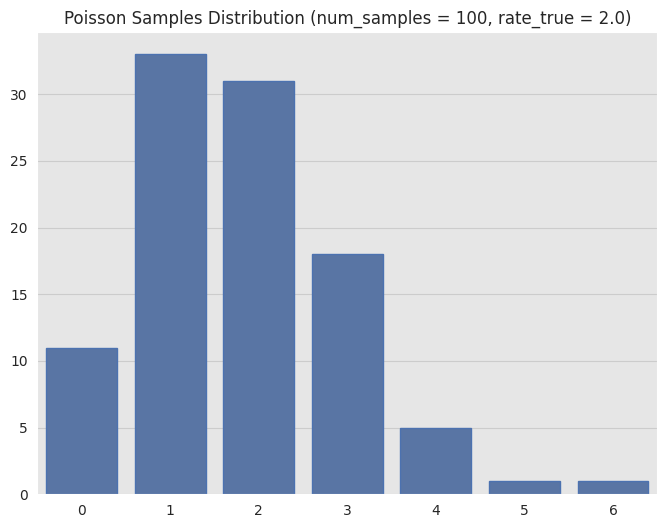

In [ ]:

# now we want to plot the distribution here
y_range, idy, c = tf.unique_with_counts(poisson_samples)

fig, ax = plt.subplots()
sns.barplot(x=y_range.numpy(), y=c.numpy(), color=sns_c[0], edgecolor=sns_c[0], ax=ax)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(title=f'Poisson Samples Distribution (num_samples = {n}, rate_true = {rate_true})')


In [16]:

from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()

sns.set_context(context='talk', font_scale=0.7)

plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions

# need to check the docs
tfb = tfp.bijectors


In [18]:
import functools, inspect, sys

def print_subclasses_from_module(module, base_class, maxwidth=80):

  subclasses = [name for name, obj in inspect.getmembers(module) if inspect.isclass(obj) and issubclass(obj, base_class)]

  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += "," + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))





In [19]:
# vectorizing

mats = tf.random.uniform(shape=[1000, 10, 10])
vecs = tf.random.uniform(shape=[1000, 10, 1])

def for_loop_solve():
  return np.array([tf.linalg.solve(mats[i, ...], vecs[i, ...]) for i in range(1000)])

def vectorized_solve():
  return tf.linalg.solve(mats, vecs)

%timeit for_loop_solve()
%timeit vectorized_solve()



665 ms ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.56 ms ± 62 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
# calculating the differentiation
a = tf.constant(np.pi)
b = tf.constant(np.e)

with tf.GradientTape() as tape:
  tape.watch([a, b])
  c =.5 * (a**2 + b**2)

grads = tape.gradient(c, [a, b])

print(grads[0])
print(grads[1])


tf.Tensor(3.1415927, shape=(), dtype=float32)
tf.Tensor(2.7182817, shape=(), dtype=float32)


# Tensorflow Probability Structure
There are two levels in Tensorflow probabilty structure - one is the low -level building blocks and the other is the high level constructs  

# The Low Level structure
- Distributions
- Bijectors

# High(er) - level constructs of the Probability structure  
- Markov chain - Monte Carlo
- Probabilistic Layers
- Structural Time Series
- Generalized Linear Models
- Optimizers


In [21]:
# Tensorflow covers these distributions
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)


AutoCompositeTensorDistribution,Autoregressive,BatchBroadcast,BatchConcat
BatchReshape,Bates,Bernoulli,Beta,BetaBinomial,BetaQuotient,Binomial,Blockwise
Categorical,Cauchy,Chi,Chi2,CholeskyLKJ,ContinuousBernoulli
DeterminantalPointProcess,Deterministic,Dirichlet,DirichletMultinomial
Distribution,DoublesidedMaxwell,Empirical,ExpGamma,ExpInverseGamma
ExpRelaxedOneHotCategorical,Exponential,ExponentiallyModifiedGaussian
FiniteDiscrete,Gamma,GammaGamma,GaussianProcess,GaussianProcessRegressionModel
GeneralizedExtremeValue,GeneralizedNormal,GeneralizedPareto,Geometric,Gumbel
HalfCauchy,HalfNormal,HalfStudentT,HiddenMarkovModel,Horseshoe,Independent
Inflated,InverseGamma,InverseGaussian,JohnsonSU,JointDistribution
JointDistributionCoroutine,JointDistributionCoroutineAutoBatched
JointDistributionNamed,JointDistributionNamedAutoBatched
JointDistributionSequential,JointDistributionSequentialAutoBatched,Kumaraswamy
LKJ,LambertWDistribution,LambertWNormal,Laplace,LinearGaussianStateSpaceModel
Log

In [22]:
# matrix variate Distribution
lkj = tfd.LKJ(dimension=10, concentration=[1.5, 3.0])
print("Batch shape: ", lkj.batch_shape)
print("Event shape: ", lkj.event_shape)


Batch shape:  (2,)
Event shape:  (10, 10)


In [23]:
samples = lkj.sample()
print("Samples shape: ", samples.shape)


Samples shape:  (2, 10, 10)


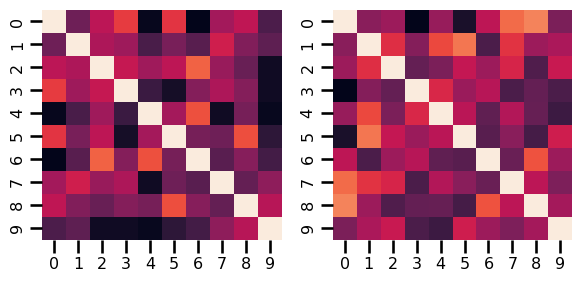

In [26]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
sns.heatmap(samples[0, ...], ax=axes[0], cbar=False)
sns.heatmap(samples[1, ...], ax=axes[1], cbar=False)
fig.tight_layout()
plt.show()


## Guassian Processes in TS pProbability Model

In [27]:

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
xs = np.linspace(-5., 5., 200).reshape([-1, 1])
gp = tfd.GaussianProcess(kernel, index_points=xs)
print("Bathc shape: ", gp.batch_shape)
print("Event shape: ", gp.event_shape)


Bathc shape:  ()
Event shape:  (200,)


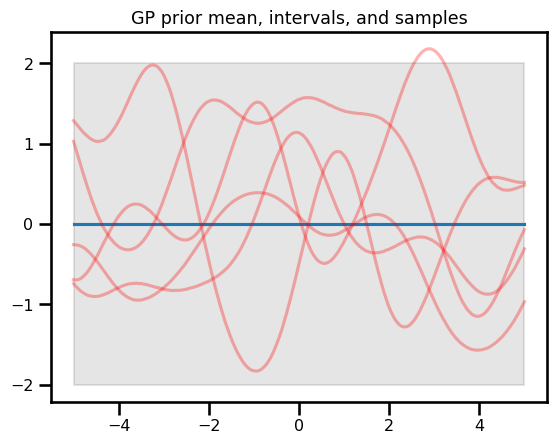

In [28]:

upper, lower = gp.mean() + [2 * gp.stddev(), -2 * gp.stddev()]
plt.plot(xs, gp.mean())
plt.fill_between(xs[...,0], upper, lower, color='k', alpha=.1)

for _ in range(5):
  plt.plot(xs, gp.sample(), c='r', alpha=.3)
plt.title(r"GP prior mean, intervals, and samples")
plt.show()


## Bijectors in TS probability library - More details

- Bijectors represent (mostly) invertible, smooth functions.
- They can beused to transform distributions
- Bijectors preserve the ability to take samples and compute thelog_probs

### The example down below re-present this

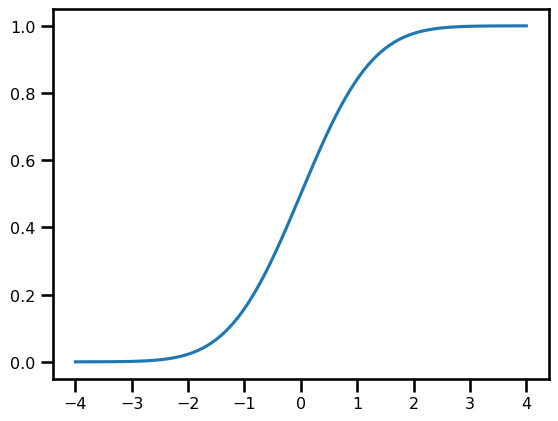

In [29]:

# Base of the Bijectors
normal_cdf = tfp.bijectors.NormalCDF()
xs = np.linspace(-4., 4., 200)
plt.plot(xs, normal_cdf.forward(xs))
plt.show()


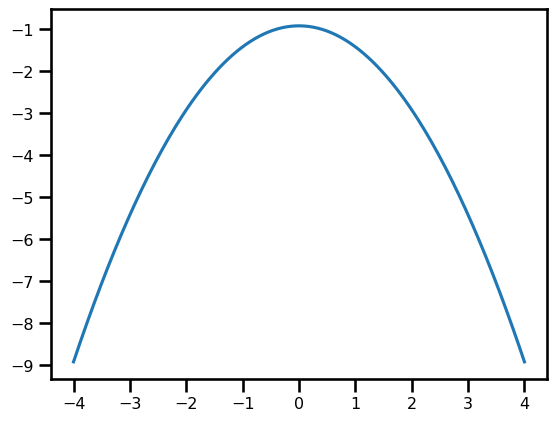

In [30]:
# Bijector - jacobian forward log
plt.plot(xs, normal_cdf.forward_log_det_jacobian(xs, event_ndims=0))
plt.show()


<ipython-input-31-4247ac507189>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples, norm_hist=True, kde=False)


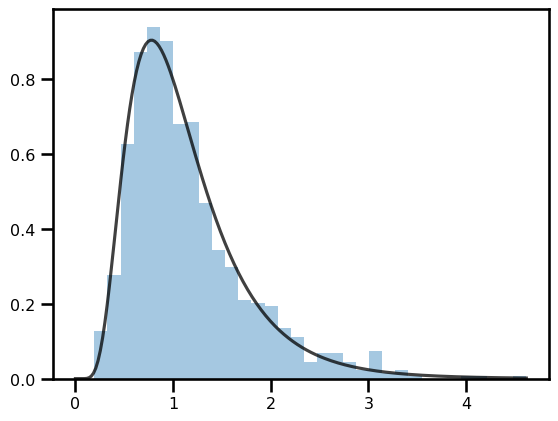

In [31]:
# Transforming a distribution with Bijector
exp_bijector = tfp.bijectors.Exp()
log_normal = exp_bijector(tfd.Normal(0., .5))

samples = log_normal.sample(1000)
xs = np.linspace(1e-10, np.max(samples), 200)
sns.distplot(samples, norm_hist=True, kde=False)
plt.plot(xs, log_normal.prob(xs), c='k', alpha=.75)
plt.show()

